In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [50]:
from multiprocessing import Pool
import miscFunc as mF
import time
import math
import mandelbrot as mb
import matplotlib.pyplot as plt
import random
from matplotlib import rc, rcParams
from matplotlib.ticker import MultipleLocator
import numpy as np
%matplotlib inline


def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    runtime = time.time()-tp1
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    print("Results", result)
    print("Overall Time:", (runtime))
    return runtime


def array_generator(size):
    """
    Generates an array with len(array) = size. If size < 13 then len(array) = 13.
    """
    
    # include some numbers that are prime numbers
    array = [15488801, 23596147, 23456789, 23496587, 23527573, 23572337, 23576489, 23594761, 97313179, 97654321, 98303927, 98447547, 98463527]
    
    while len(array)<size:
        array.append(random.randint(10000000,99999999))
    # shuffle the array
    random.shuffle(array)
    return array


def plotter(array, target):
    """
    Generates a plot to visualise the speedup from using multiple processes.
    """
    rc('font', size=20)
    rc('font', family='serif')
    fig = plt.figure(figsize=(20,10))
    ax = plt.subplot(111)
    idx = np.linspace(1,4,4)
    ax.plot(idx, array, 'o-')
    plt.grid(True, which='both', alpha=0.25)
    ax.set_title("check_prime Function Runtime ({} elements)".format(len(target)), fontsize=30)
    ax.set_xlabel("Processes", fontsize=20)
    ax.set_ylim(0,max(array)+5)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.set_ylabel("Runtime (s)", fontsize=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig("images/RuntimeElements{}.png".format(len(target)), bbox_inches="tight")

    fig = plt.figure(figsize=(20,10))
    ax = plt.subplot(111)
    idx = np.linspace(1,4,4)
    ax.plot(np.log(idx), array, 'o-')
    plt.yscale('log')
    plt.grid(True, which='both', alpha=0.25)
    ax.set_title("check_prime Function Runtime ({} elements)".format(len(target)), fontsize=30)
    ax.set_xlabel("Processes", fontsize=20)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.set_ylabel("Log of Runtime (s)", fontsize=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.gcf()
    plt.savefig("images/LogRuntimeElements{}.png".format(len(target)), bbox_inches="tight")


In [52]:
%%time
new_array = array_generator(20)
new_runtimes = []

for i in range(1,5):
    if i == 1:
        print("\nRunning", i, "process...")
    else:
        print("\nRunning", i, "processes...")
    new_runtimes.append(pool_process(mF.check_prime, new_array, i))


Running 1 process...
Results [False, True, True, True, True, False, True, False, True, True, False, False, False, True, True, False, True, True, False, True]
Overall Time: 87.34038996696472

Running 2 processes...
Results [False, True, True, True, True, False, True, False, True, True, False, False, False, True, True, False, True, True, False, True]
Overall Time: 52.04978156089783

Running 3 processes...
Results [False, True, True, True, True, False, True, False, True, True, False, False, False, True, True, False, True, True, False, True]
Overall Time: 29.467183828353882

Running 4 processes...
Results [False, True, True, True, True, False, True, False, True, True, False, False, False, True, True, False, True, True, False, True]
Overall Time: 21.38480234146118
Wall time: 3min 10s


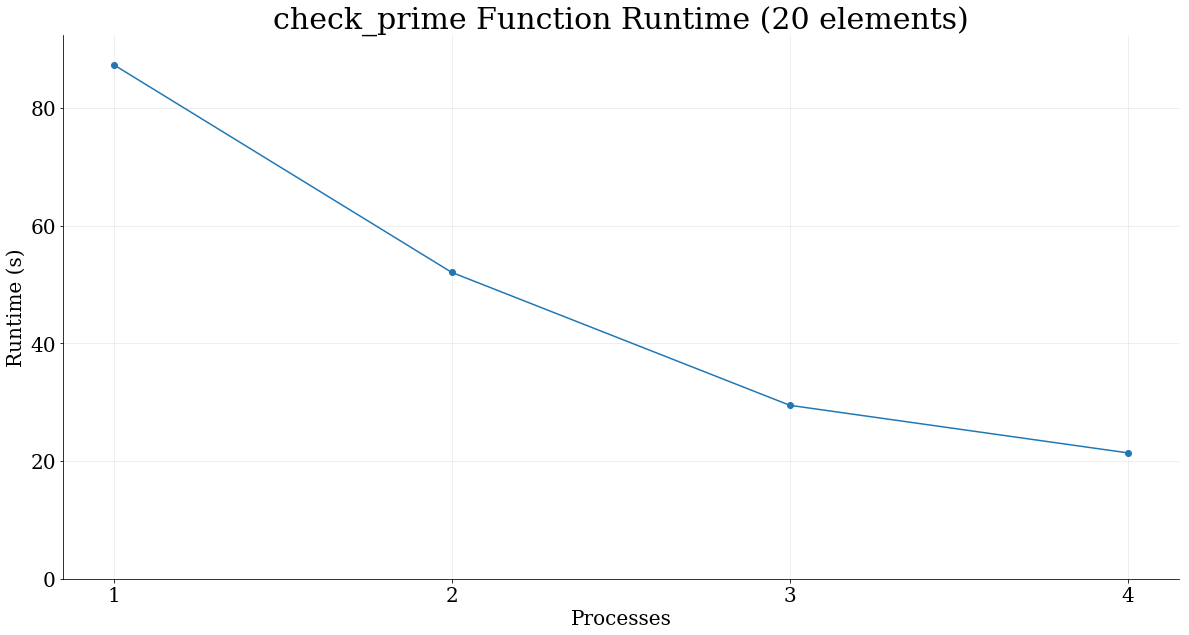

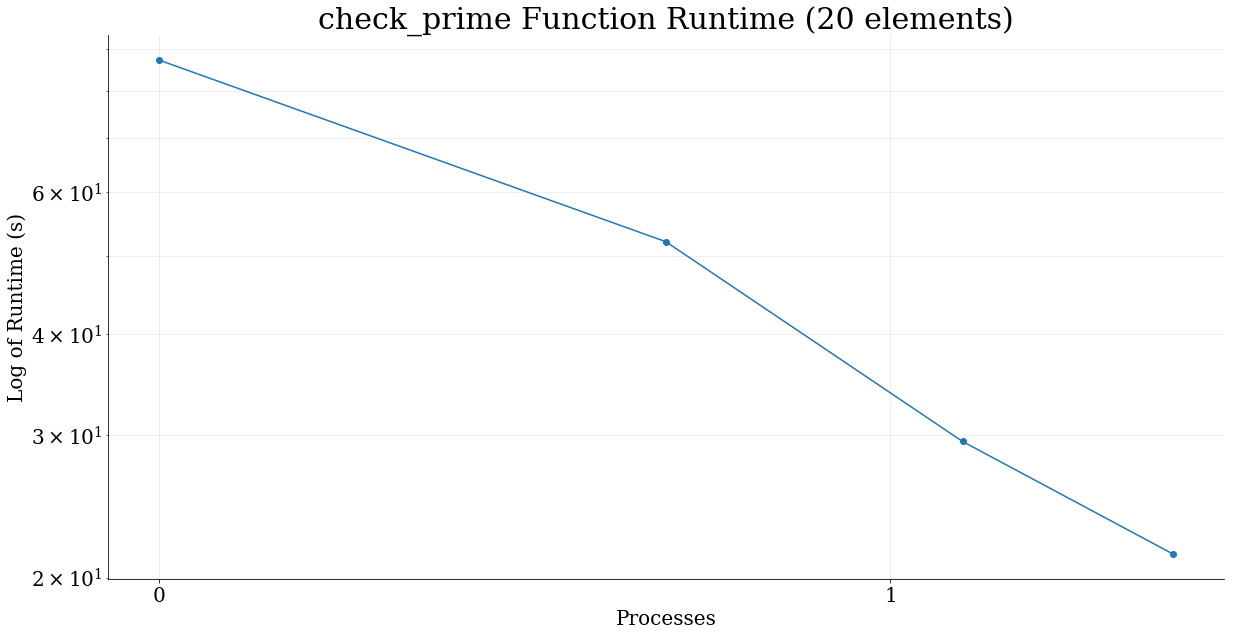

In [53]:
plotter(new_runtimes, new_array)

In [54]:
for i, rt in enumerate(new_runtimes):
    print("Performance increase using", i+1, "processes:", str(round(100*(new_runtimes[0]/rt)-100,2)) + "%")

Performance increase using 1 processes: 0.0%
Performance increase using 2 processes: 67.8%
Performance increase using 3 processes: 196.4%
Performance increase using 4 processes: 308.42%


Wall time: 0 ns

Running 1 process...
Overall Time: 318.90900921821594


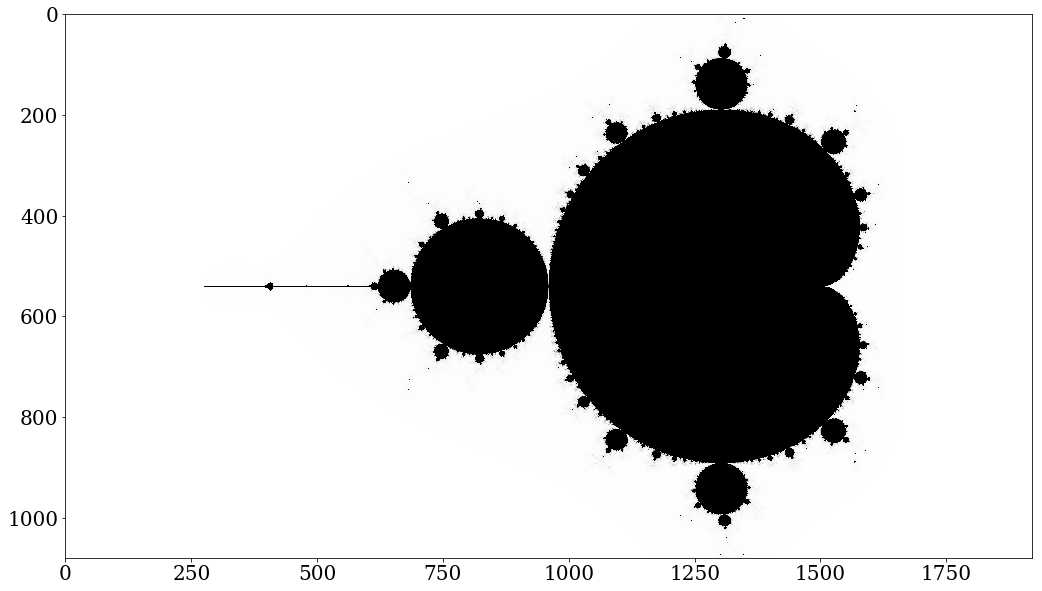


Running 2 processes...
Overall Time: 161.0592131614685


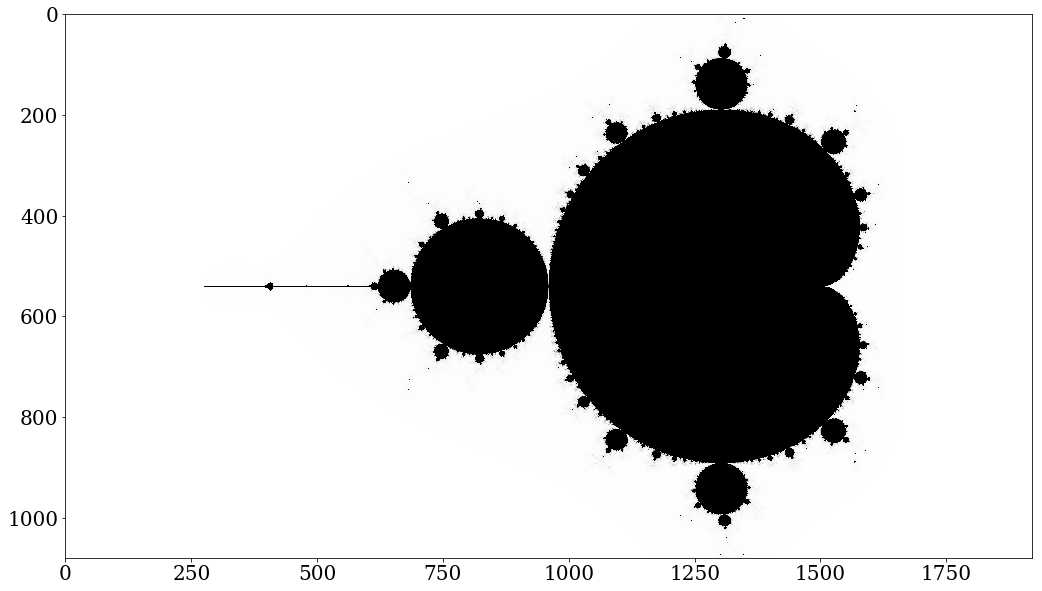


Running 3 processes...
Overall Time: 111.51572775840759


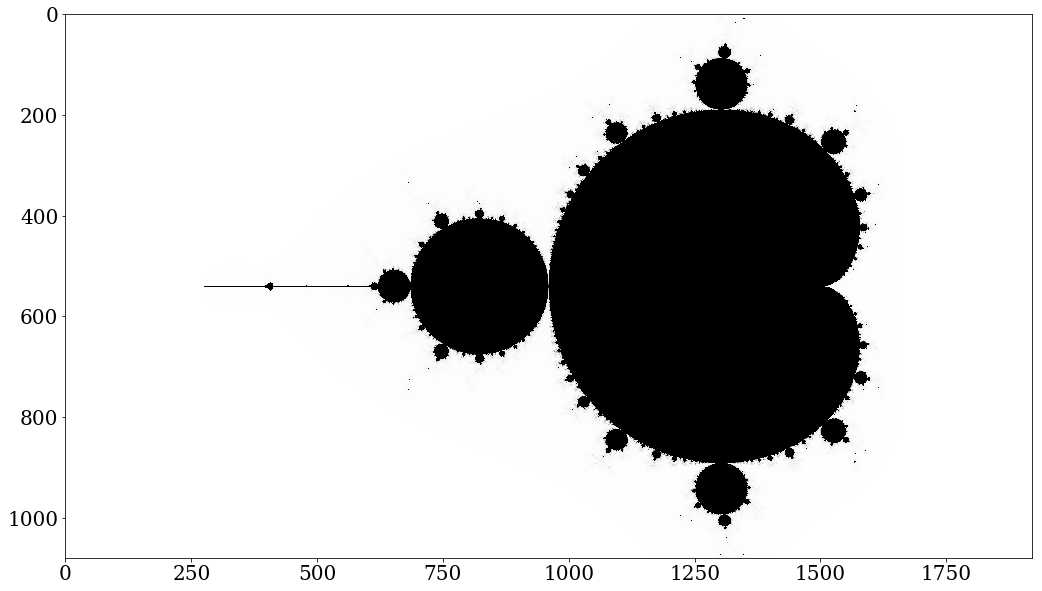


Running 4 processes...
Overall Time: 86.66419863700867


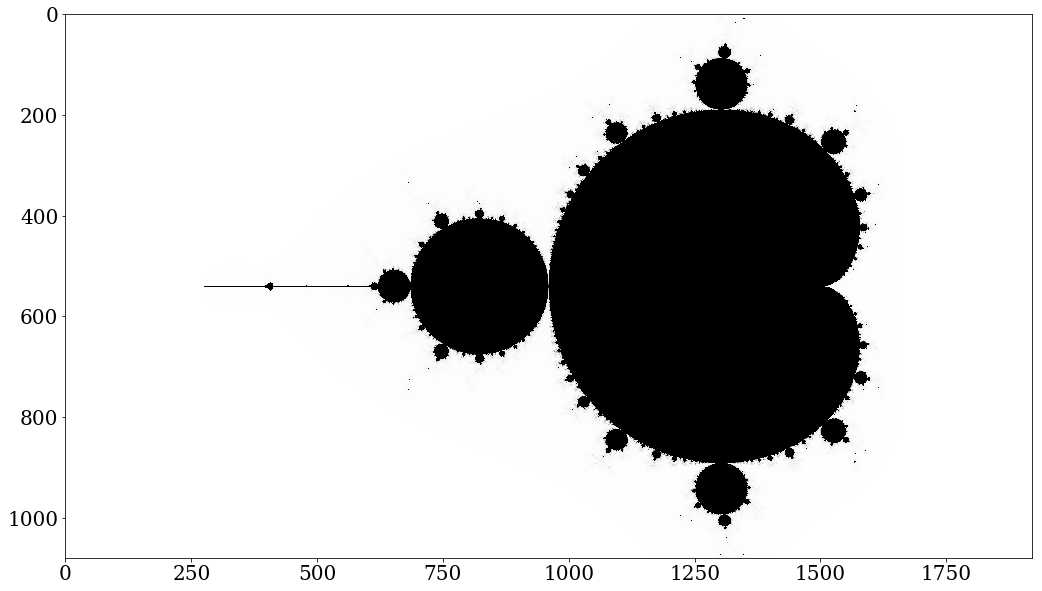

In [6]:
%time
mandelbrot_runtimes = []
for i in range(1,5):
    if i == 1:
        print("\nRunning", i, "process...")
    else:
        print("\nRunning", i, "processes...")
    mandelImg, rt = mb.mandelbrotCalcSet(i, 1080, 1920, 1000)
    plt.figure(figsize=(20,10))
    plt.imshow(mandelImg, cmap='binary')
    plt.show()
    mandelbrot_runtimes.append(rt)

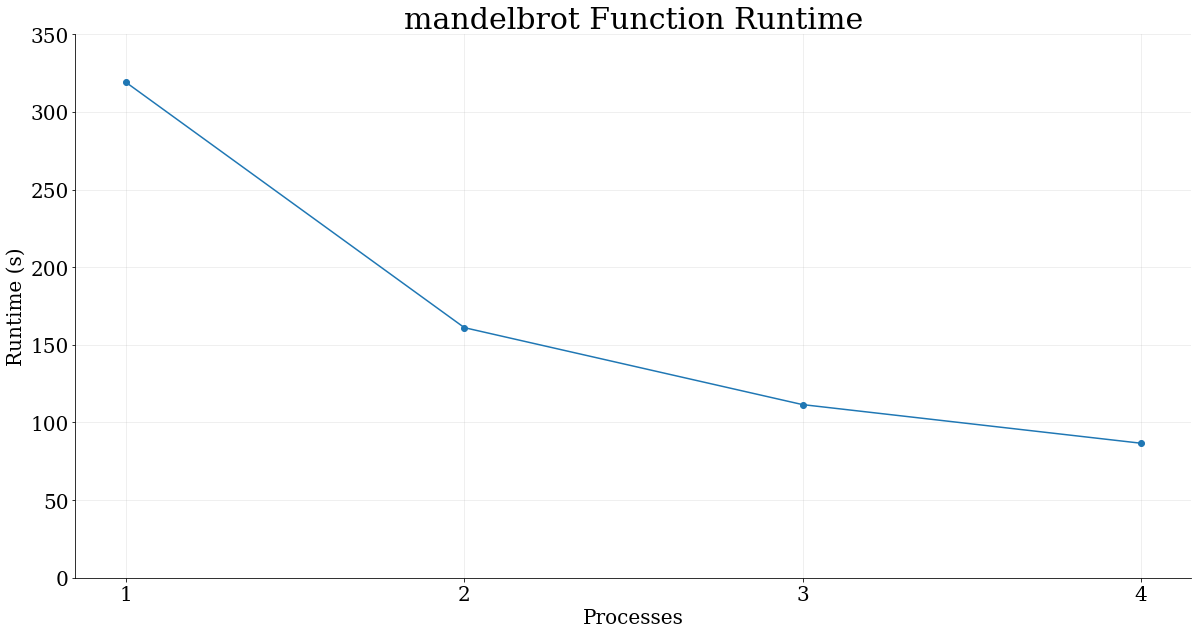

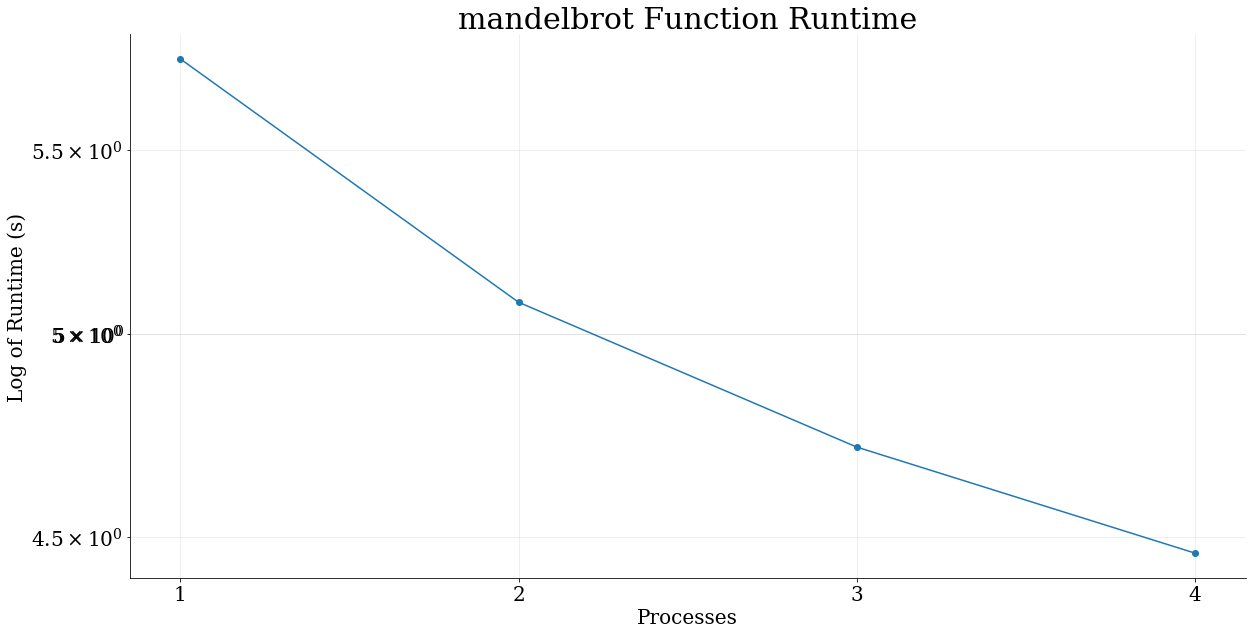

In [56]:
rc('font', size=20)
rc('font', family='serif')
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
idx = np.linspace(1,4,4)
ax.plot(idx, mandelbrot_runtimes, 'o-')
plt.grid(True, which='both', alpha=0.25)
ax.set_title("mandelbrot Function Runtime", fontsize=30)
ax.set_xlabel("Processes", fontsize=20)
ax.set_ylim(0, 350)
ax.set_ylabel("Runtime (s)", fontsize=20)
# ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("images/RuntimeMandel.png", bbox_inches="tight")
plt.show()

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
idx = np.linspace(1,4,4)
ax.plot(idx, np.log(mandelbrot_runtimes), 'o-')
plt.yscale('log')
plt.grid(True, which='both', alpha=0.25)
ax.set_title("mandelbrot Function Runtime", fontsize=30)
ax.set_xlabel("Processes", fontsize=20)
ax.set_ylabel("Log of Runtime (s)", fontsize=20)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("images/MandelLog.png", bbox_inches="tight")
plt.show()

In [10]:
for i, rt in enumerate(mandelbrot_runtimes):
    print("Performance increase using", i+1, "processes:", str(round(100*(mandelbrot_runtimes[0]/rt)-100,2)) + "%")

Performance increase using 1 processes: 0.0%
Performance increase using 2 processes: 98.01%
Performance increase using 3 processes: 185.98%
Performance increase using 4 processes: 267.98%
